# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [ ]:
import numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt

# A library for data manipulation and analysis.
import pandas as pd
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Import the unit tests defined for this notebook.

In [ ]:
import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [ ]:
path = "Data/tvmarketing.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [ ]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [ ]:
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

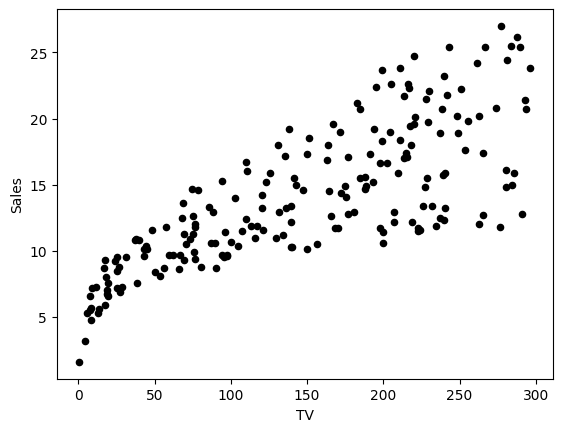

In [ ]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [ ]:
X = adv[['TV']]
Y = adv[['Sales']]

print("X (TV marketing expenses):", X.head())
print("Y (Sales amount):", Y.head())


X (TV marketing expenses):       TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
Y (Sales amount):    Sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [ ]:
import numpy as np
m_numpy, b_numpy = np.polyfit(X.values.flatten(), Y.values, deg=1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")


Linear regression with NumPy. Slope: [0.04753664]. Intercept: [7.03259355]


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [ ]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):
    """
    Using mx + b to make predictions with numpy.

    Parameters:
    m : Slope of the regression line.
    b : Intercept of the regression line.
    X : Input: marketing expenses.

    Returns:
    numpy.ndarray
        Predicted values based on input X.
    """
    # Compute predictions
    y = m * X + b  # Calculating predicted Y values
    return y


In [ ]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [ ]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [ ]:
lr_sklearn = LinearRegression()


The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [ ]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200, 1)
Shape of Y array: (200, 1)


You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [ ]:
import numpy as np
X_sklearn = X.values.reshape(-1, 1)
Y_sklearn = Y.values.reshape(-1, 1)

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 20% of the data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

# Printing  the shapes of the resulting datasets
print(f"Shape of training X: {X_train.shape}")
print(f"Shape of testing X: {X_test.shape}")
print(f"Shape of training Y: {Y_train.shape}")
print(f"Shape of testing Y: {Y_test.shape}")


Shape of training X: (160, 1)
Shape of testing X: (40, 1)
Shape of training Y: (160, 1)
Shape of testing Y: (40, 1)


Step 2: Fit the linear regression model to the training data


In [ ]:
lr_sklearn.fit(X_train, Y_train) #Insert proper arguments fro training asper step 1

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [ ]:
Y_pred = lr_sklearn.predict(X_test)#use test data from X from step 1 above)
print(f"Predictions: {Y_pred}")

Predictions: [[14.71794394]
 [16.2115484 ]
 [20.74819743]
 [ 7.66403631]
 [17.37013877]
 [10.61402143]
 [17.2072847 ]
 [ 9.44612512]
 [17.46785121]
 [15.2669948 ]
 [ 8.58532504]
 [ 9.73460946]
 [18.03086098]
 [ 7.37089899]
 [13.61053628]
 [15.03899911]
 [ 7.45930549]
 [16.31391381]
 [10.62332738]
 [18.16579721]
 [17.79821232]
 [10.27435438]
 [ 8.88776831]
 [18.79394862]
 [10.33019006]
 [ 9.60897918]
 [17.05373658]
 [13.60123034]
 [11.17703121]
 [ 7.51048819]
 [16.41627922]
 [10.339496  ]
 [16.37440246]
 [ 7.90599093]
 [20.18053468]
 [18.203021  ]
 [ 9.36702457]
 [19.85482655]
 [12.57292322]
 [ 8.39920611]]


 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [ ]:
#Insert your code here
from sklearn.metrics import mean_squared_error
rmse =  mean_squared_error(Y_test, Y_pred, squared=False)
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3.194472431998898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

rf_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)
Y_pred_dt = dt_model.predict(X_test)

rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
rmse_dt = mean_squared_error(Y_test, Y_pred_dt, squared=False)

# The issue was here: you were assigning the function itself, not the result of calling it
# model_rank = {
#    'Linear Regression': rmse, # rmse was probably not defined or was the function mean_squared_error itself
#    'Random Forest': rmse_rf,
#    'Decision Trees': rmse_dt
#}

# Fix: Assuming 'rmse' is meant to hold the RMSE for Linear Regression, ensure it's calculated correctly
# If 'rmse' is already calculated in a previous cell, you can directly use it here.
# If not, you might need to calculate it like this (replace with your actual prediction for Linear Regression):

# Assuming Y_pred contains the predictions from your Linear Regression model
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Now, create the model_rank dictionary with the calculated RMSE values
model_rank = {
    'Linear Regression': rmse, # Now using the calculated rmse value
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [ ]:
for model, metric in model_rank.items():
    print(f"{model}: {metric}")

Linear Regression: 3.194472431998898
Random Forest: 2.970724433746245
Decision Trees: 3.445214071723265


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [ ]:
X_sklearn = X_sklearn.reshape(X_sklearn.shape[0], X_sklearn.shape[1])
Y_sklearn = Y_sklearn.reshape(Y_sklearn.shape[0], Y_sklearn.shape[1])
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [ ]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [ ]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [ ]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)
    ### END CODE HERE ###

    return Y

In [ ]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [ ]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

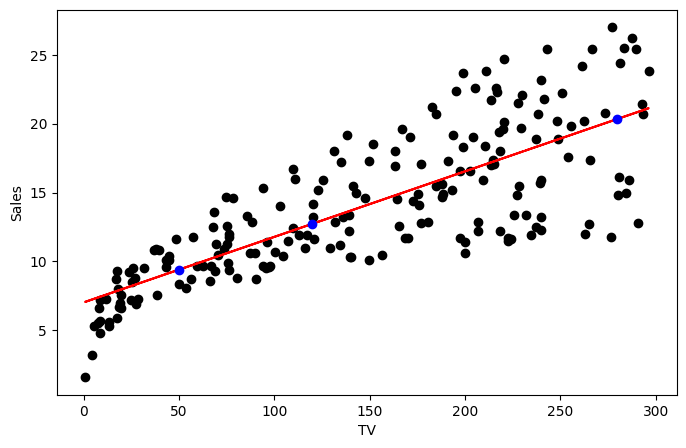

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [ ]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

print("X_norm:", X_norm)
print("Y_norm:", Y_norm)


X_norm:            TV
0    0.969852
1   -1.197376
2   -1.516155
3    0.052050
4    0.394182
..        ...
195 -1.270941
196 -0.617035
197  0.349810
198  1.594565
199  0.993206

[200 rows x 1 columns]
Y_norm:         Sales
0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
..        ...
195 -1.234053
196 -0.830548
197 -0.234898
198  2.205347
199 -0.119610

[200 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Define cost function according to the equation $(1)$:

In [ ]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [ ]:
import numpy as np

def dEdm(m, b, X, Y):
    X = np.array(X, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)
    res = (1 / len(Y)) * np.sum((m * X + b - Y) * X)
    return res

def dEdb(m, b, X, Y):
    X = np.array(X, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)
    res = (1 / len(Y)) * np.sum(m * X + b - Y)
    return res


In [ ]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.21777557513839405
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [ ]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [ ]:
import numpy as np

# Define the cost function E(m, b, X, Y)
def E(m, b, X, Y):
    return np.mean((m * X + b - Y) ** 2)

# Gradient functions
def dEdm(m, b, X, Y):
    return (1 / len(Y)) * np.sum((m * X + b - Y) * X)

def dEdb(m, b, X, Y):
    return (1 / len(Y)) * np.sum(m * X + b - Y)

# Gradient descent implementation
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ### (~ 2 lines of code)
        m_new = m - learning_rate * dEdm(m, b, X, Y)  # Update m
        b_new = b - learning_rate * dEdb(m, b, X, Y)  # Update b
        ### END CODE HERE ###

        # Update parameters
        m = m_new
        b = b_new

        if print_cost:
            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b


# My data
X = np.array([230.1, 44.5, 17.2, 151.5, 180.8])  # TV marketing expenses
Y = np.array([22.1, 10.4, 9.3, 18.5, 12.9])       # Sales

# Normalize the data
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_norm = (Y - Y_mean) / Y_std

# Initialize parameters
m_initial = 0
b_initial = 0
num_iterations = 1000
learning_rate = 0.01  # Adjusted learning rate

# Perform gradient descent
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

# Print results
print(f"Gradient descent result: m_min = {m_gd}, b_min = {b_gd}")


Cost after iteration 0: 0.985362905121917
Cost after iteration 1: 0.9710170884319081
Cost after iteration 2: 0.9569567534940309
Cost after iteration 3: 0.9431762192214167
Cost after iteration 4: 0.9296699175808276
Cost after iteration 5: 0.9164323913428867
Cost after iteration 6: 0.9034582918770802
Cost after iteration 7: 0.8907423769906438
Cost after iteration 8: 0.8782795088104474
Cost after iteration 9: 0.8660646517070365
Cost after iteration 10: 0.8540928702599839
Cost after iteration 11: 0.8423593272637275
Cost after iteration 12: 0.8308592817730966
Cost after iteration 13: 0.8195880871877292
Cost after iteration 14: 0.8085411893746107
Cost after iteration 15: 0.7977141248279731
Cost after iteration 16: 0.7871025188658138
Cost after iteration 17: 0.7767020838623016
Cost after iteration 18: 0.7665086175153589
Cost after iteration 19: 0.7565180011487206
Cost after iteration 20: 0.7467261980477783
Cost after iteration 21: 0.7371292518285448
Cost after iteration 22: 0.727723284839074


In [ ]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.5422845484413322, -4.3298697960382076e-19)
(0.9863870537929061, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [ ]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

Test case "default_check". Wrong output value m of the function gradient_descent.
m = 0, b = 0, learning_rate = 0.001, num_iterations = 1000. 
	Expected: 
0.49460408269589484
	Got: 
0.5422845484413322
Test case "extra_check". Wrong output value m of the function gradient_descent.
m = 1, b = 5, learning_rate = 0.01, num_iterations = 10. 
	Expected: 
0.9791767513915026
	Got: 
0.9863870537929061
 2  Tests passed
 2  Tests failed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [ ]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2938888903035471
Cost after iteration 1: 0.26564444591568903
Cost after iteration 2: 0.26451466814017466
Cost after iteration 3: 0.2644694770291541
Cost after iteration 4: 0.2644676693847132
Cost after iteration 5: 0.2644675970789356
Cost after iteration 6: 0.2644675941867045
Cost after iteration 7: 0.2644675940710153
Cost after iteration 8: 0.26446759406638765
Cost after iteration 9: 0.26446759406620257
Cost after iteration 10: 0.2644675940661952
Cost after iteration 11: 0.2644675940661949
Cost after iteration 12: 0.2644675940661949
Cost after iteration 13: 0.26446759406619486
Cost after iteration 14: 0.2644675940661949
Cost after iteration 15: 0.26446759406619497
Cost after iteration 16: 0.26446759406619486
Cost after iteration 17: 0.2644675940661949
Cost after iteration 18: 0.2644675940661949
Cost after iteration 19: 0.26446759406619486
Cost after iteration 20: 0.26446759406619486
Cost after iteration 21: 0.26446759406619486
Cost after iteration 22: 0.26446

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [ ]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[10.76718056 14.39050802 22.67239937]


In [ ]:
# Install FastAPI and Uvicorn for serving the application
!pip install fastapi uvicorn

# Install Pydantic for data validation
!pip install pydantic

!pip install nest-asyncio

!pip install "fastapi[stadard]"


In [ ]:
#What imports do we need for Fast api
from fastapi import Depends, FastAPI, Header, HTTPException
import uvicorn
import nest_asyncio


In [ ]:
#What imports do we need for Fast api
import nest_asyncio
import pandas as pd
from fastapi import FastAPI, Body
from pydantic import BaseModel

# Load your pre-trained linear regression model (replace with your actual model loading logic)
from sklearn.linear_model import LinearRegression  # Assuming you're using sklearn.linear_model
lr_sklearn = LinearRegression()  # Load the model here (adjust based on your model type)

class TVSalesRequest(BaseModel):
  tv_ad_budget: float = Body(..., description="TV ad budget for prediction.")

app = FastAPI()

# Apply nest_asyncio to allow asynchronous operations within FastAPI
nest_asyncio.apply()

@app.get("/")
async def predict_fast_api(request: TVSalesRequest):
  """
  This endpoint predicts TV sales based on the provided TV ad budget.
  """
  data = pd.DataFrame({'TV': [request.tv_ad_budget]})
  tv_sales = lr_sklearn.predict(data)[0]  # Accessing the predicted value
  return {"tv_sales": tv_sales}

if __name__ == "__main__":
    host = "0.0.0.0"  # Listening on all interfaces for remote access
    port = 8000
    uvicorn.run(app, host=host, port=port)

INFO:     Started server process [850]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.